In [1]:
import random
import math
import numpy as np
import scipy.stats as stats
import statistics
from scipy.stats import wrapcauchy
import matplotlib.pyplot as plt



In [37]:
def rw2(n):# save the headings not the pairs
    #x,y=0,0
    x=np.zeros(n)
    y=np.zeros(n)
    theta=[0]*n
    theta[0]=wrapcauchy.rvs(c,loc=0,size=1)
    if theta[0]>2*math.pi:
            theta[0] = theta[0] - 2* math.pi
    if theta[0]<0:
            theta[0] = theta[0] + 2* math.pi
    for i in range(1,n):
        r=random.weibullvariate(alpha,beta)
        theta[i]=wrapcauchy.rvs(c,loc=theta[i-1],size=1)# c is the shape parameter
        if theta[i]>2*math.pi:
            theta[i] =theta[i] - 2* math.pi
        if theta[i]<0:
            theta[i] = theta[i] + 2* math.pi
        x[i]=x[i-1]+r*math.cos(theta[i])
        y[i]=y[i-1]+r*math.sin(theta[i])
        #x+=r*math.cos(theta[i])
        #y+=r*math.sin(theta[i])
    return theta 
n=int(input("how many steps?"))
alpha=int(input("what's the scale?"))
beta=int(input("what's the shape?"))
c=float(input("What's the shape parameter for the wrapped Cauchy?"))# this needs to be between 0 and 1
#tries=int(input("how many tries?"))
#or i in range(tries):
    #print(rw2(n))
data=rw2(n)
data

how many steps?100
what's the scale?2
what's the shape?5
What's the shape parameter for the wrapped Cauchy?0.9


[array([ 0.36980374]),
 array([ 5.76141073]),
 array([ 5.66112971]),
 array([ 5.61154396]),
 array([ 5.56369868]),
 array([ 5.69774006]),
 array([ 5.49197129]),
 array([ 5.51321987]),
 array([ 5.59888145]),
 array([ 5.56337279]),
 array([ 5.28551554]),
 array([ 5.21770609]),
 array([ 5.31694152]),
 array([ 5.21699961]),
 array([ 5.25700387]),
 array([ 5.27065279]),
 array([ 5.40085905]),
 array([ 3.79945612]),
 array([ 3.92806143]),
 array([ 4.02408389]),
 array([ 4.03281164]),
 array([ 4.1194478]),
 array([ 4.16876073]),
 array([ 3.839648]),
 array([ 4.06520932]),
 array([ 3.72170561]),
 array([ 3.62803871]),
 array([ 3.43912646]),
 array([ 3.44457689]),
 array([ 3.41880756]),
 array([ 3.46712289]),
 array([ 1.64740425]),
 array([ 1.33986481]),
 array([ 1.21679468]),
 array([ 1.22572889]),
 array([ 1.21878255]),
 array([ 1.31682872]),
 array([ 1.25534508]),
 array([ 1.31590753]),
 array([ 1.30300141]),
 array([ 6.20422562]),
 array([ 6.19612678]),
 array([ 6.05694497]),
 array([ 6.022

In [38]:
# modify the data so I can have the differences
#data[1]=data[1]-data[0] etc.
new_data=np.zeros(n)
new_data[0]=data[0]
for i in range(len(data)-1):
    new_data[i+1]=abs(data[i+1]-data[i])# I can only put positive values
new_data    

array([  3.69803743e-01,   5.39160699e+00,   1.00281023e-01,
         4.95857543e-02,   4.78452745e-02,   1.34041376e-01,
         2.05768771e-01,   2.12485784e-02,   8.56615877e-02,
         3.55086611e-02,   2.77857254e-01,   6.78094448e-02,
         9.92354226e-02,   9.99419016e-02,   4.00042557e-02,
         1.36489157e-02,   1.30206268e-01,   1.60140293e+00,
         1.28605308e-01,   9.60224584e-02,   8.72775281e-03,
         8.66361611e-02,   4.93129321e-02,   3.29112730e-01,
         2.25561322e-01,   3.43503718e-01,   9.36668982e-02,
         1.88912246e-01,   5.45042964e-03,   2.57693284e-02,
         4.83153262e-02,   1.81971864e+00,   3.07539444e-01,
         1.23070130e-01,   8.93421629e-03,   6.94634346e-03,
         9.80461681e-02,   6.14836396e-02,   6.05624519e-02,
         1.29061254e-02,   4.90122422e+00,   8.09884495e-03,
         1.39181810e-01,   3.47625276e-02,   3.05277288e+00,
         2.93002340e-02,   2.17951442e-03,   7.43802426e-03,
         2.36115922e-01,

In [33]:
# calculate the log likelihood of wrapcauchy
def log_wclikelihood(x,a,b):
     return sum(wrapcauchy.logpdf(x,c=a,loc=b))# c is the shape parameter
    

In [47]:
#n=100 #number of observations in a sample 
# initial guess for theta(a) as array,these are shape(c) 
guess = 0.9
# Prepare storing MCMC chain as array of arrays.
A = [guess]
# define stepsize of MCMC.
stepsize = 0.035  # array of stepsizes
accepted  = 0.0
old_theta=guess# define initial values for theta 
old_loglik = log_wclikelihood(new_data,old_theta,0)#calculate the first log likelihood
# Metropolis-Hastings with 10,000 iterations.
for p in range(10000):
    #old_theta  = A[len(A)-1]   old parameter value as array(not that elegant way)
    # Suggest new candidate from Gaussian proposal distribution.
    #new_theta = np.zeros([len(old_theta)])
    new_theta = old_theta + stats.norm(0, stepsize).rvs() 
    #add the restraints on new_theta
    if new_theta<0 or new_theta>1: 
        continue
    new_loglik = log_wclikelihood(new_data,new_theta,0)
    # Accept new candidate in Monte-Carlo fashing.
    if (new_loglik > old_loglik):
        A.append(new_theta)
        accepted = accepted + 1.0  # monitor acceptance
        old_loglik=new_loglik
        old_theta=new_theta
    else:
        u = random.uniform(0.0,1.0)
        if (u < math.exp(new_loglik - old_loglik)):
            A.append(new_theta)
            accepted = accepted + 1.0  # monitor acceptance
            old_loglik=new_loglik
            old_theta=new_theta
        #else:
            #A.append(old_alpha)(I guess this is not good)
print("Acceptance rate = "+str(accepted/10000.0))
#print(A)


Acceptance rate = 0.4053


In [48]:
# save the posterior for a
statistics.mean(A)   


0.90243785817437905

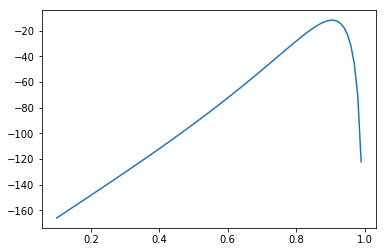

In [67]:
# plots now
from random import randint

loglike = np.zeros(100)
xval = np.zeros(100)

for i in range(100):
    xval[i]=0.1+i*0.01
    loglike[i] = log_wclikelihood(new_data,xval[i],0)
    

plt.plot(xval,loglike)
plt.show()


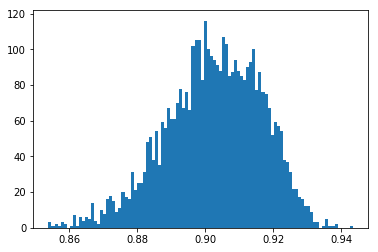

In [71]:
plt.hist(A,bins=100)
plt.show()
